In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , RobustScaler , QuantileTransformer , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
df = pd.read_csv('/Users/raidneghiz/Documents/financial_inclusion/Financial_inclusion_dataset.csv')
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
df.shape

(23524, 13)

In [4]:
df['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [5]:
df['year'].unique()

array([2018, 2016, 2017])

In [6]:
df['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [7]:
df['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [8]:
df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [9]:
df1= df.copy()

In [10]:
df1=df1.drop(columns='uniqueid')

In [12]:
df1.isna().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [15]:
df1

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [16]:
encoder = LabelEncoder()
df1['country'] = encoder.fit_transform(df1['country'])
df1['bank_account'] = encoder.fit_transform(df1['bank_account'])
df1['location_type'] = encoder.fit_transform(df1['location_type'])
df1['cellphone_access'] = encoder.fit_transform(df1['cellphone_access'])
df1['gender_of_respondent'] = encoder.fit_transform(df1['gender_of_respondent'])
df1['relationship_with_head'] = encoder.fit_transform(df1['relationship_with_head'])
df1['marital_status'] = encoder.fit_transform(df1['marital_status'])
df1['education_level'] = encoder.fit_transform(df1['education_level'])
df1['job_type'] = encoder.fit_transform(df1['job_type'])

In [18]:
df1

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,0,0,1,4,48,0,1,0,0,7
23520,3,2018,0,0,1,2,27,0,1,3,3,7
23521,3,2018,0,0,1,5,27,0,4,4,2,7
23522,3,2018,0,1,1,7,30,0,4,0,3,9


<Axes: >

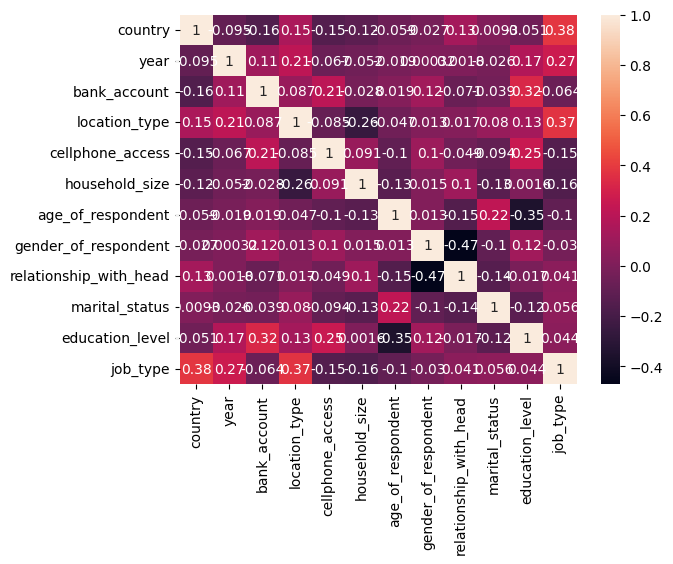

In [19]:
correlations = df1.corr()
sns.heatmap(correlations , annot= True)

In [20]:
def plots(df):
    figure = make_subplots(2,6)
    for i , column in enumerate(df.columns) :
        row = (i//6)+1
        col = (i%6)+1
        figure.add_trace(go.Box(y=df[column] , name= column) , row= row , col= col)
    figure.update_layout(width = 1000 , showlegend = False)
    figure.show()

plots(df1)


In [21]:
x = df1.drop(columns='bank_account')
y = df1['bank_account']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18819, 11), (4705, 11), (18819,), (4705,))

In [24]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train , y_train)

LogisticRegression(max_iter=1000)

In [25]:
y_pred = log_reg.predict(x_test)

In [26]:
log_accuracy = accuracy_score(y_test , y_pred)
log_accuracy

0.8790648246546228

In [34]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5)

In [35]:
y_pred = decision_tree.predict(x_test)

In [36]:
decision_tree_accuracy = accuracy_score(y_test , y_pred)
decision_tree_accuracy

0.8865037194473964

In [37]:
random_forest = RandomForestClassifier(n_estimators=6)
random_forest.fit(x_train , y_train)

RandomForestClassifier(n_estimators=6)

In [38]:
y_pred = random_forest.predict(x_test)

In [40]:
random_forest_accuracy = accuracy_score(y_test , y_pred)
random_forest_accuracy

0.8658873538788523

In [41]:
knn = KNeighborsClassifier(n_neighbors=6 , n_jobs=-1)
knn.fit(x_train , y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [42]:
y_pred =knn.predict(x_test)

In [43]:
knn_accuracy = accuracy_score(y_test , y_pred)
knn_accuracy

0.8782146652497343

In [44]:
joblib.dump(decision_tree , 'decision_tree.pkl')

['decision_tree.pkl']